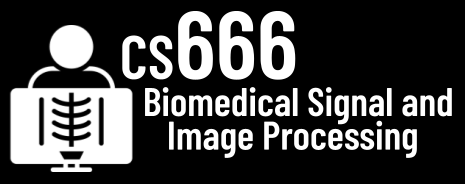
# Assignment 7

In [37]:
# NAME: Lakshmi Keerthana Aravapalli

In [38]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute and then
# use the Boostlet API!

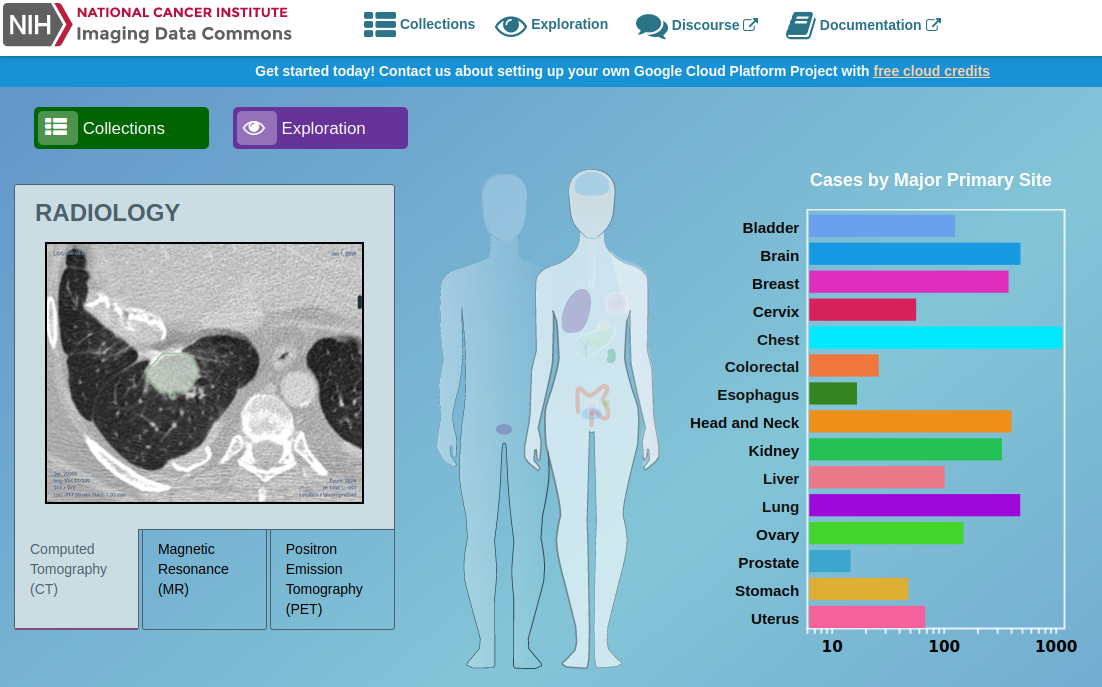

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [39]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [40]:
# Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [41]:
#
# TODO: https://www.cancerimagingarchive.net/collection/acrin-flt-breast/
#

In [42]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

TODO: Add screenshot of the viewer.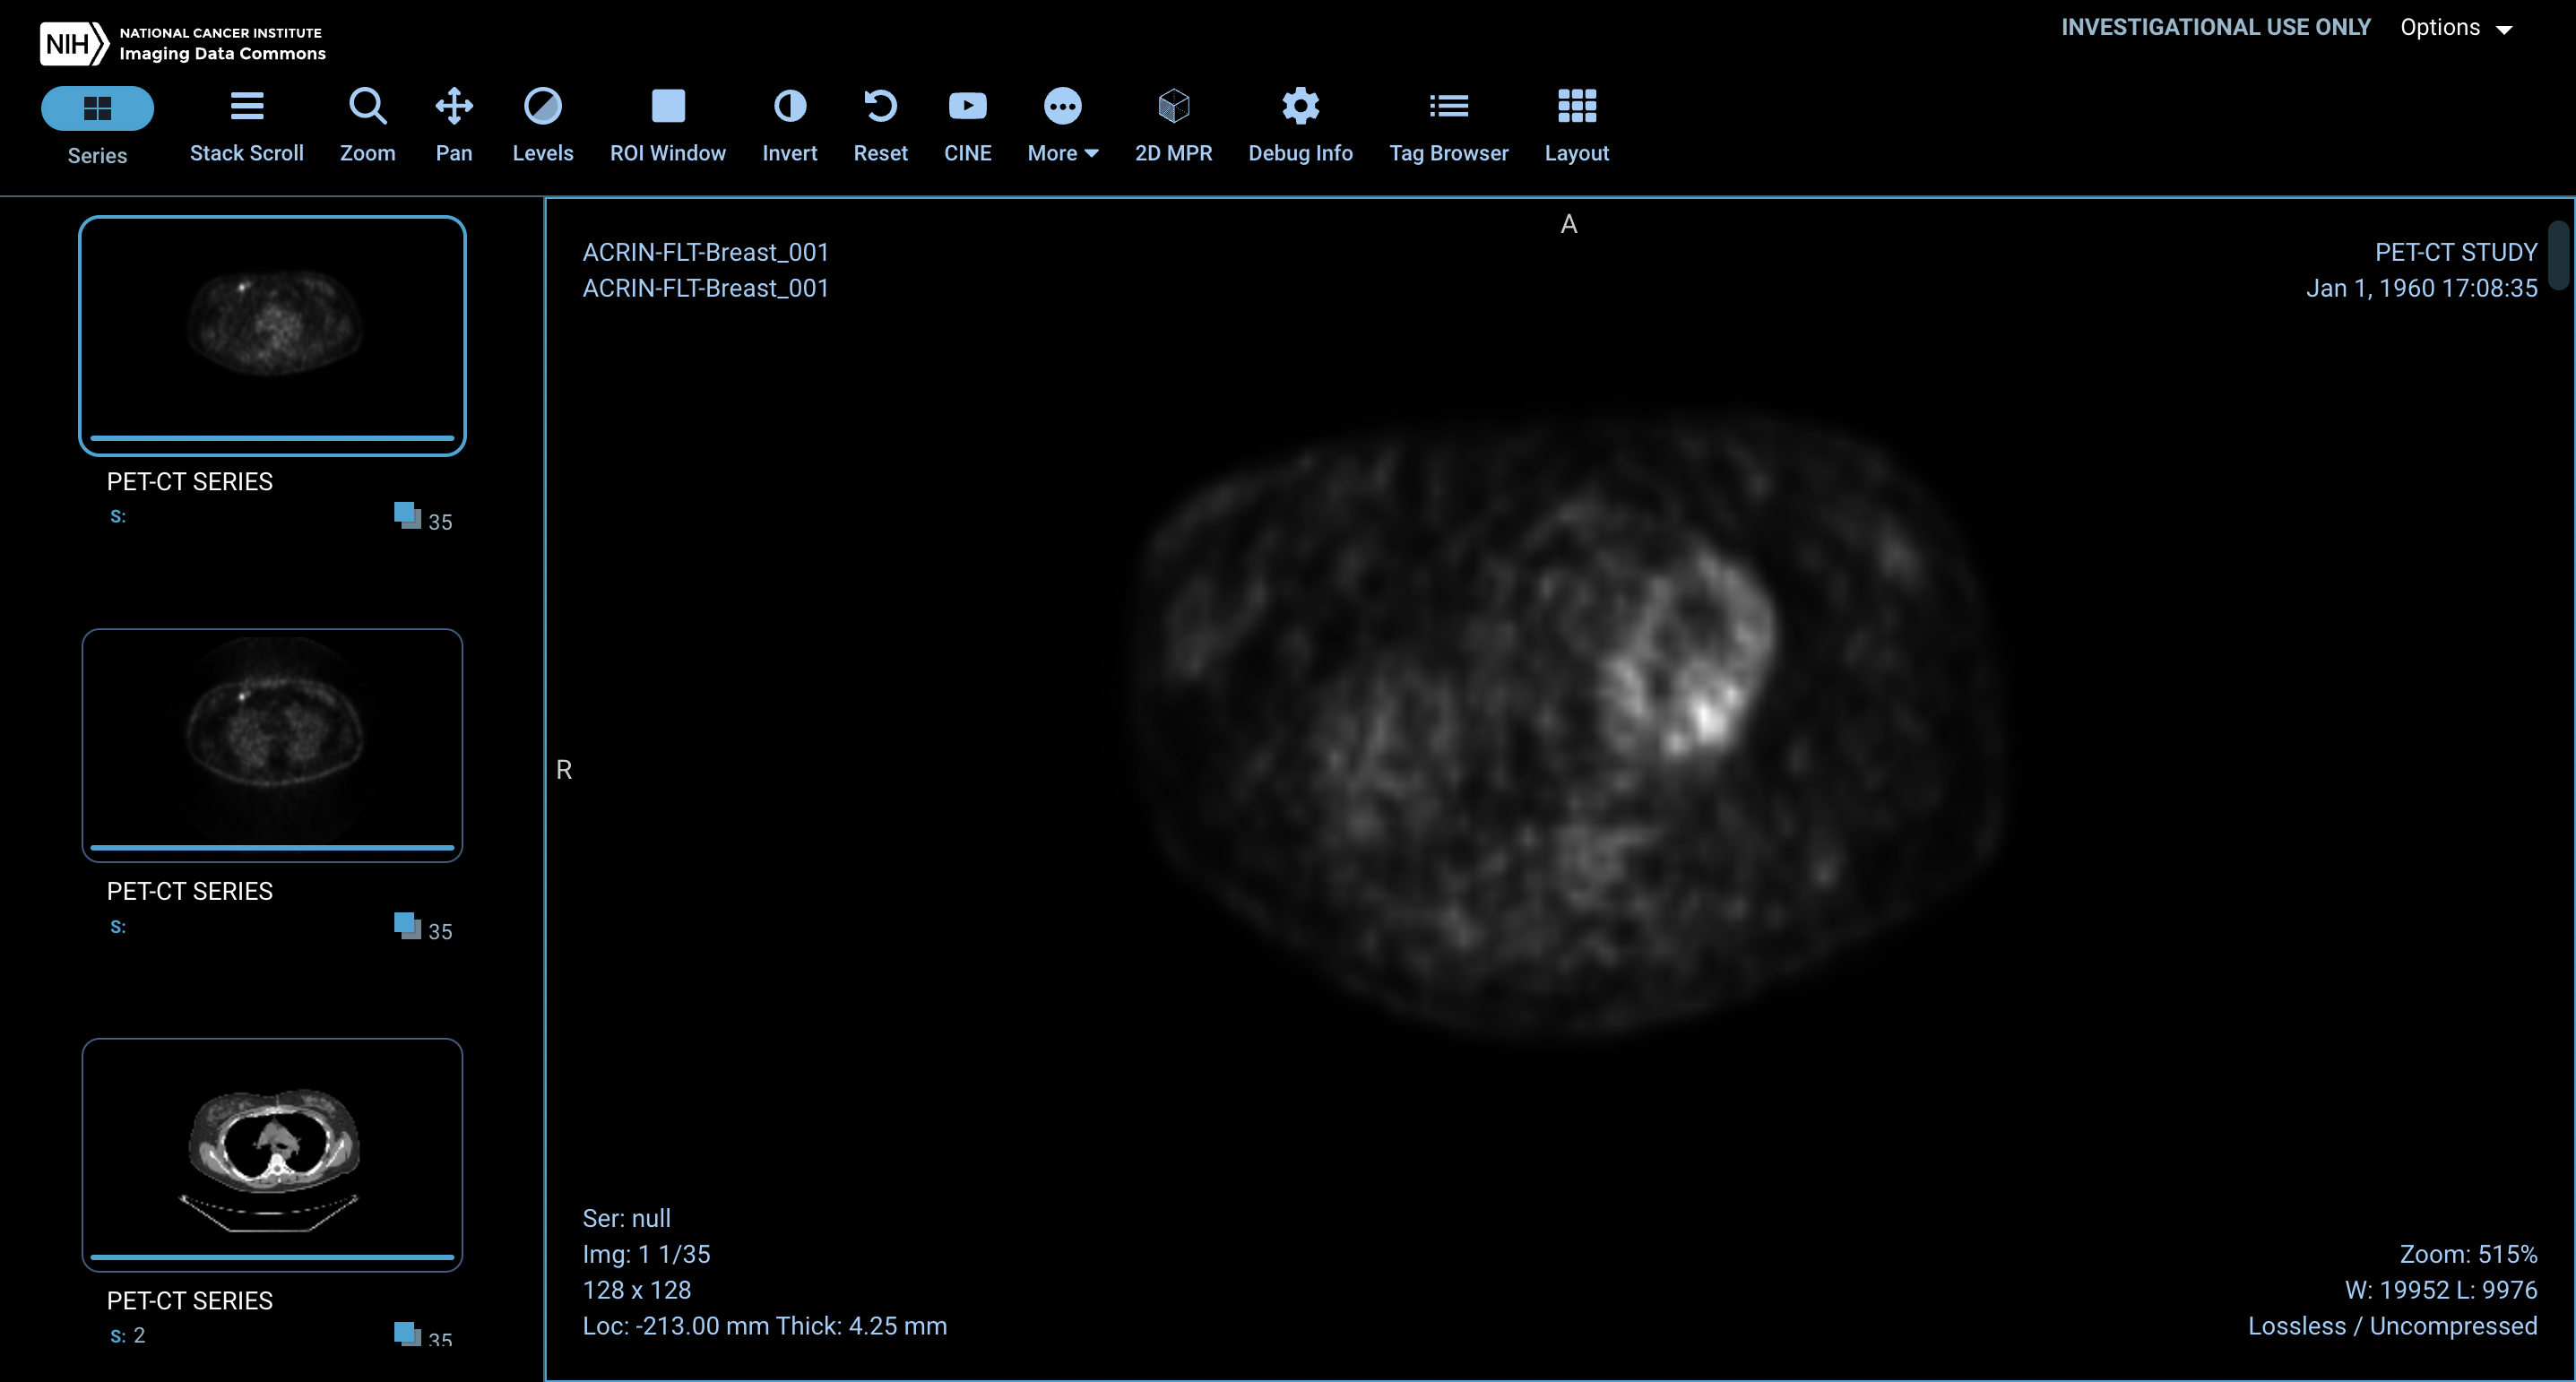

**Task 2**: Now, we will install and run the Sobel Boostlet! [15 Points]

In [43]:
# 1) In a different tab, go to https://Boostlet.org and drag the Sobel
# boostlet into your bookmarks toolbar.

In [44]:
# 2) Then, switch back to the IDC tab from Task 1 and run the Sobel Boostlet
# by clicking on it!

In [45]:
# 3) Paste a screenshot showing the filtered image.

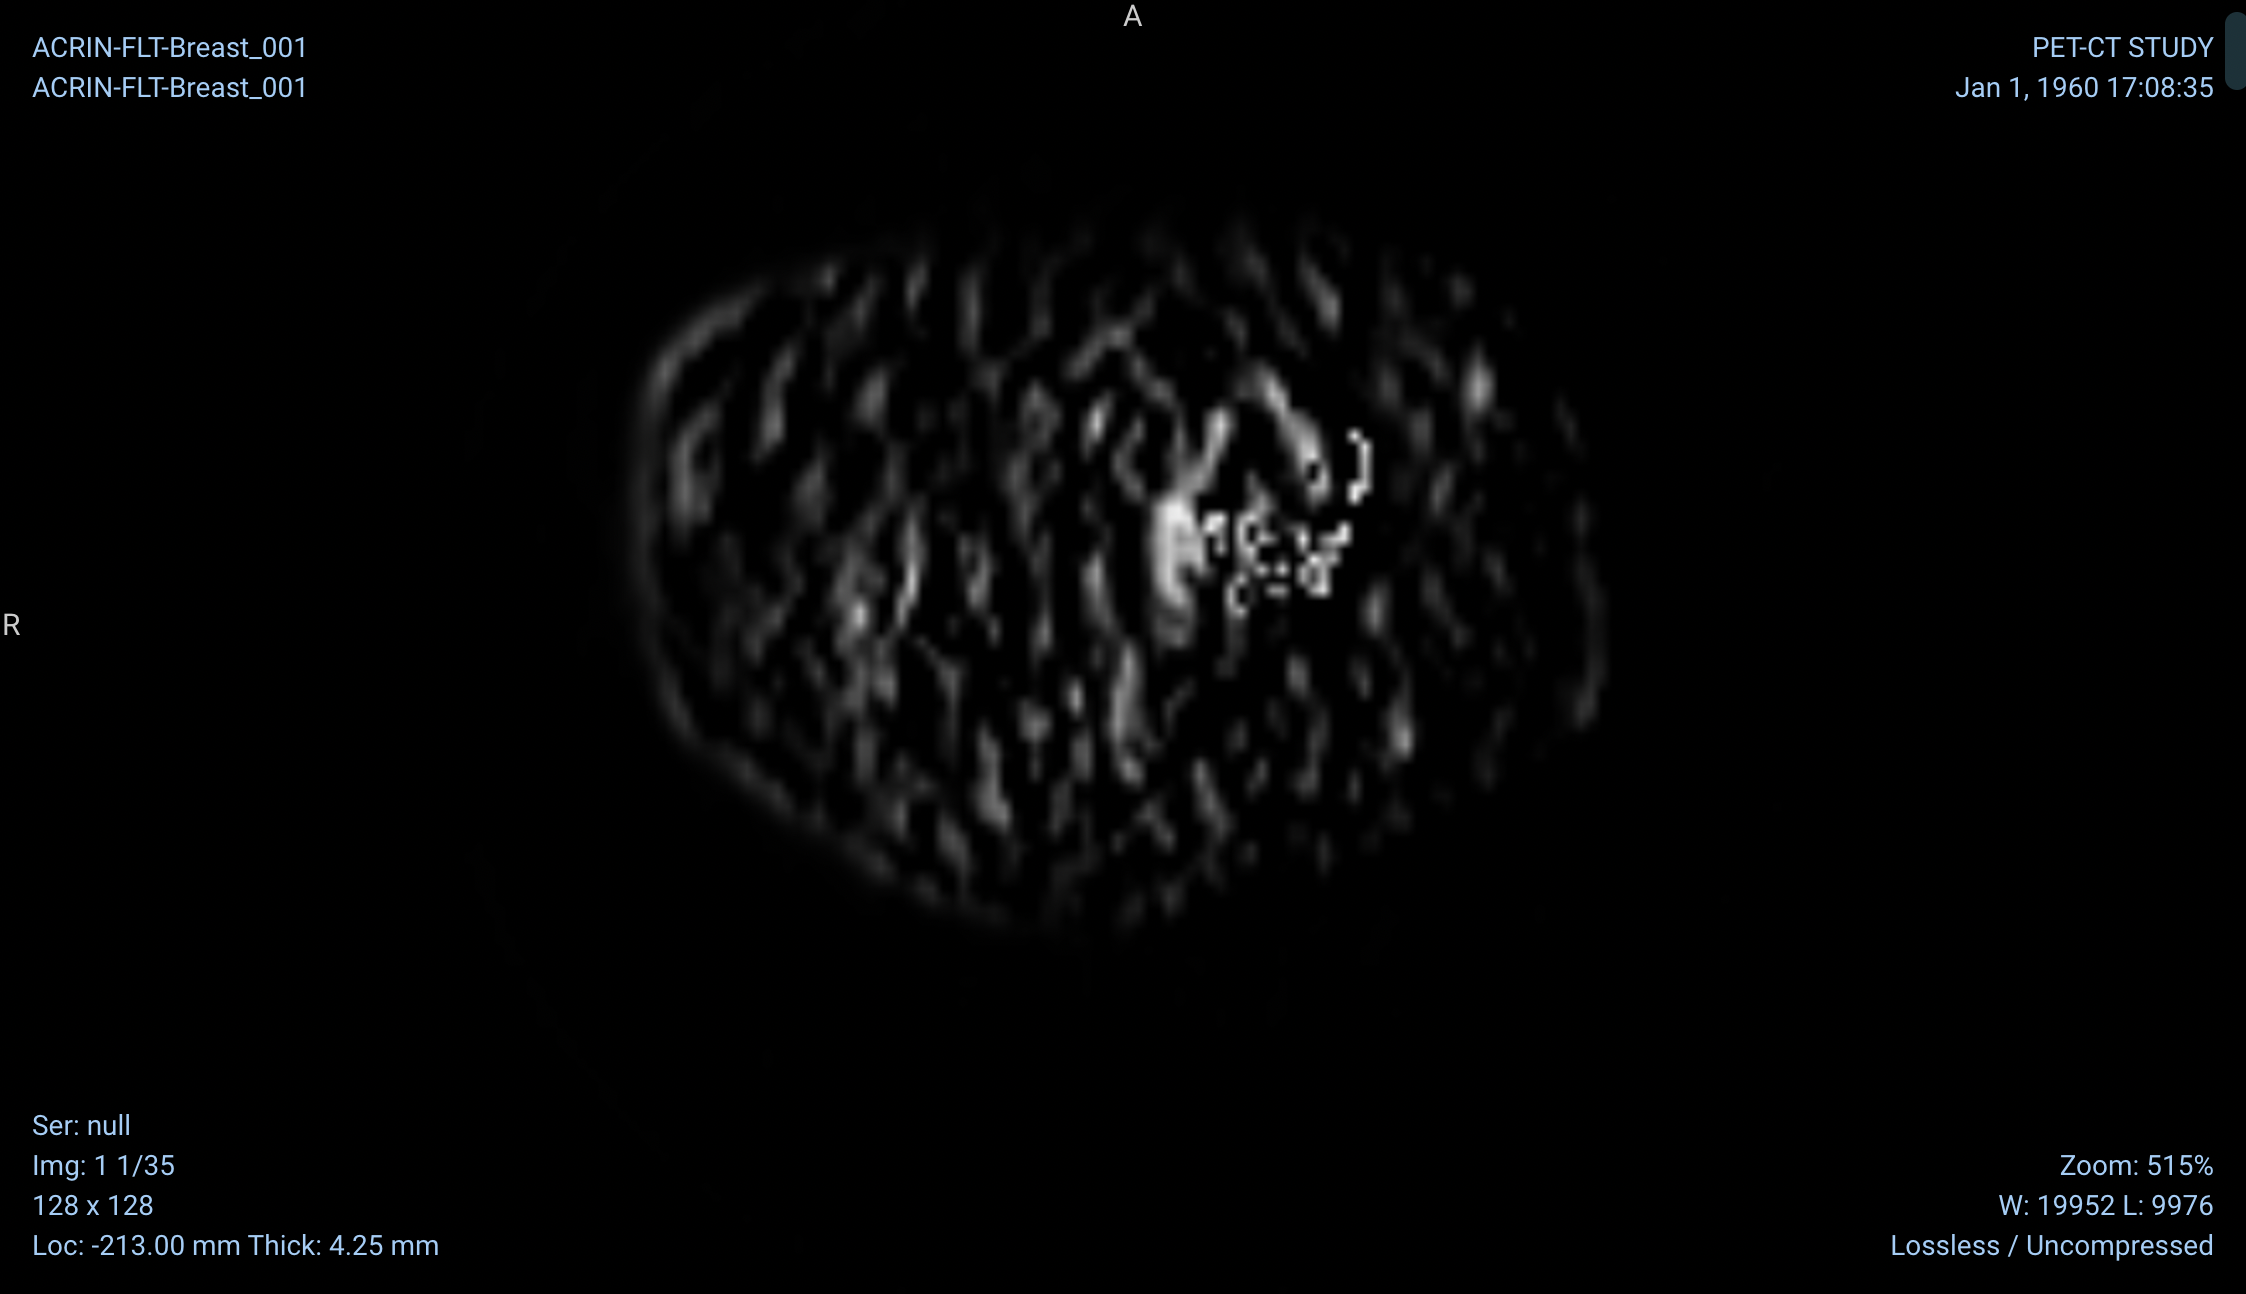

In [46]:
# 4) Study the source code of the Sobel Boostlet:
# https://github.com/mpsych/boostlet/blob/main/examples/sobel.js

In [47]:
# 5) Please describe when the run() is called and what it does.

# TODO: 1. Initializes boostlet framework
# 2. Reads an image from boostlet using boostlet.get_image
# 3. Initializes a kernel in order to detect edges
# 4. The kernel filter is applied to image data
# 5. Displays image after applying filter

**Task 3**: Let's access the pixel data using the Boostlet API! [20 Points]

In [48]:
#
# We will now use the Boostlet API to modify the pixel data
# from the IDC viewer.
#
# IMPORTANT: RELOAD THE PAGE TO CLEAR THE SOBEL FROM BEFORE!
#
# For this, please open the Developer Tools of your browser. Specifically,
# the JavaScript console.
#
# Paste and execute the following JavaScript code:
#
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";
document.head.appendChild(script);
eval(script);

'''
#
#
# Now, you will have access to the Boostlet API.
#
#
#
# The following method initializes the Boostlet methods.
#
'''
Boostlet.init()
'''
#
# It should with something like
#   Found $febea0d4681e2ae0$export$1ec7e9f19103cb25 {name: 'cornerstone2D',...
#
# This means, the Boostlet API detected cornerstone2D and is ready to rock!
#

'\nBoostlet.init()\n'

In [49]:
#
# The following code will grab the pixels of the current slice.
#
'''

image = Boostlet.get_image();
pixels = image.data;

'''

'\n\nimage = Boostlet.get_image();\npixels = image.data;\n\n'

In [50]:
# TODO: What is the maximum pixel value of the current slice?


# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [51]:
#
#
'''
MAX_VALUE = Math.max(...pixels)

'''
#
#

'\nBoostlet.init()\nimage = Boostlet.get_image();\npixels = image.data;\nMAX_VALUE = Math.max(...pixels)\n\n'

In [52]:
# TODO: MAXIMUM VALUE OF THE SLICE : 32767

**Task 4**: Let's implement thresholding! [30 Points]

In [53]:
# Write JavaScript code that sets all pixels to zero that are outside
# of the following range
#
# everything < 0.5 * MAX_VALUE
# everything > 0.8 * MAX_VALUE
#

In [54]:
#
#
'''



// TODO: YOUR CODE GOES HERE

for (let i = 0; i < pixels.length; i++) {
  if (pixels[i] < 0.5 * MAX_VALUE || pixels[i] > 0.8 * MAX_VALUE) {
      pixels[i] = 0;
}
}



'''
#
#

'\n\n\n\n// TODO: YOUR CODE GOES HERE\n\nfor (let i = 0; i < pixels.length; i++) {\n  if (pixels[i] < 0.5 * MAX_VALUE || pixels[i] > 0.8 * MAX_VALUE) {\n      pixels[i] = 0;\n}\n}\n\n\n\n'

In [55]:
# After thresholding, call
#
'''
  Boostlet.set_image(pixels);
'''
#
# to update the current slice, then take a screenshot!
#

'\n  Boostlet.set_image(pixels);\n'

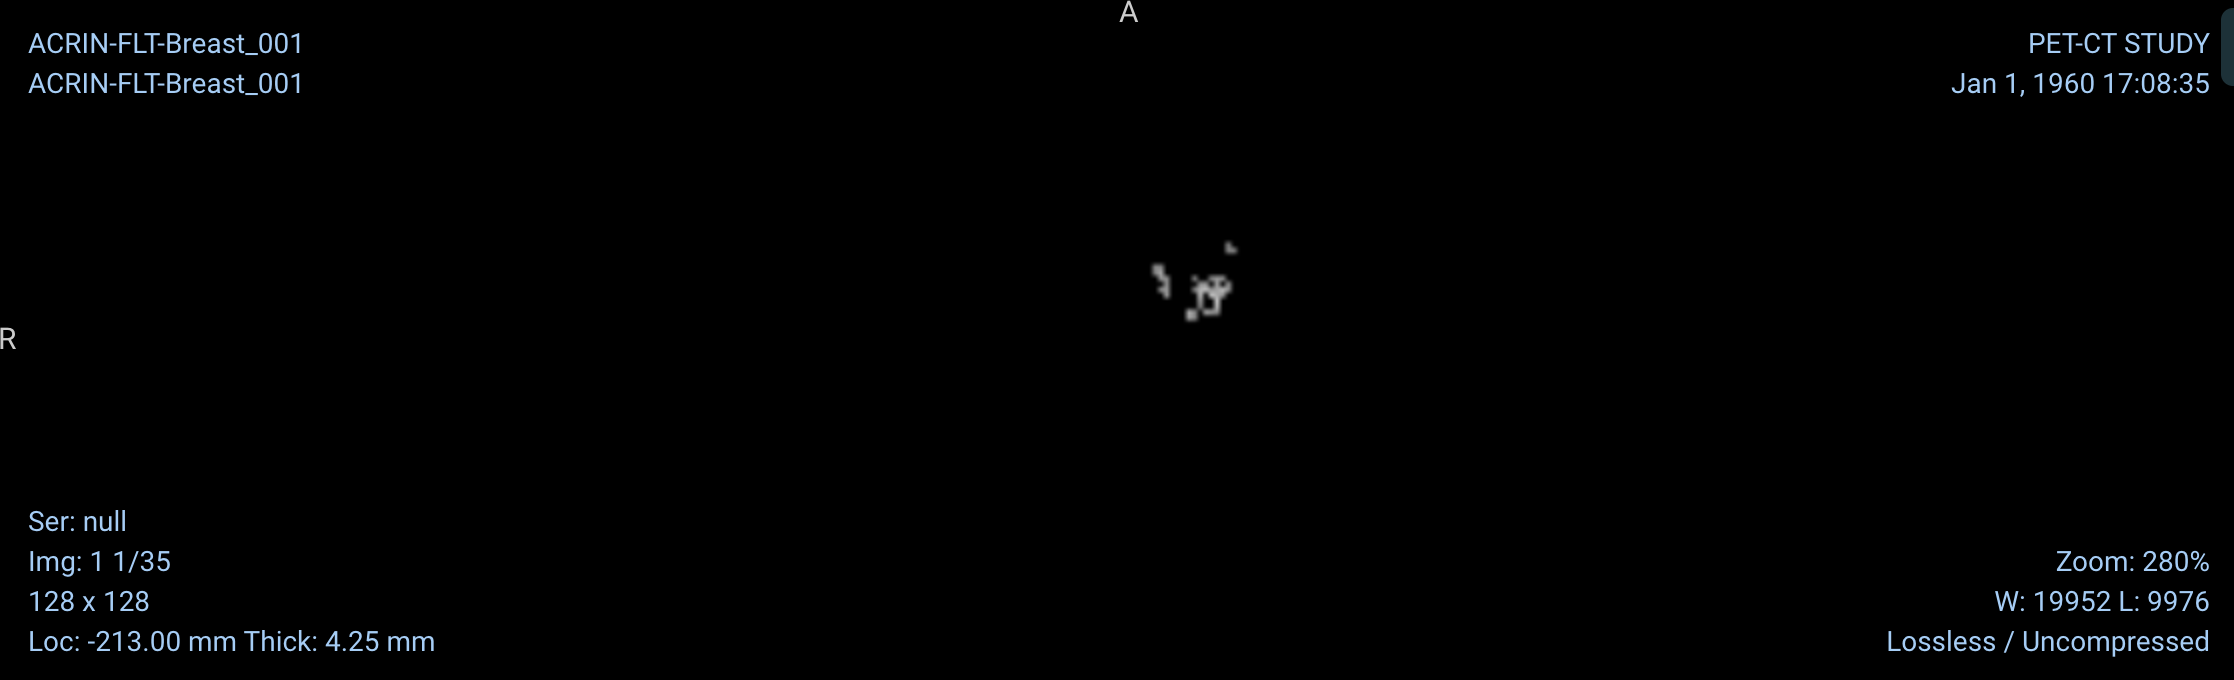

**Task 5**: Refactor your code to match the following structure. [20 Points]

In [56]:
#
#
#
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";

script.onload = run;
document.head.appendChild(script);
eval(script);

function run() {

  Boostlet.init();

  image = Boostlet.get_image();

  max_value = find_max_value( image.data );

  thresholded = threshold( image.data, 0.5 * max_value, 0.8 * max_value );

  Boostlet.set_image( thresholded );

}

function find_max_value( pixels ) {

  // TODO: YOUR CODE FROM TASK 3

  MAX_VALUE = Math.max(...pixels)
  return MAX_VALUE

}

function threshold( pixels, lower, upper ) {

  // TODO: YOUR CODE FROM TASK 4
  for (let i = 0; i < pixels.length; i++) {
  if (pixels[i] < lower || pixels[i] > upper) {
      pixels[i] = 0;
}
}

return pixels;

}

'''
#
#
#

'\n\nscript = document.createElement("script");\nscript.type = "text/javascript";\nscript.src = "https://boostlet.org/dist/boostlet.min.js";\n\nscript.onload = run;\ndocument.head.appendChild(script);\neval(script);\n\nfunction run() {\n\n  Boostlet.init();\n\n  image = Boostlet.get_image();\n\n  max_value = find_max_value( image.data );\n\n  thresholded = threshold( image.data, 0.5 * max_value, 0.8 * max_value );\n\n  Boostlet.set_image( thresholded );\n\n}\n\nfunction find_max_value( pixels ) {\n\n  // TODO: YOUR CODE FROM TASK 3\n\n  MAX_VALUE = Math.max(...pixels)\n  return MAX_VALUE\n\n}\n\nfunction threshold( pixels, lower, upper ) {\n\n  // TODO: YOUR CODE FROM TASK 4\n  for (let i = 0; i < pixels.length; i++) {\n  if (pixels[i] < lower || pixels[i] > upper) {\n      pixels[i] = 0;\n}\n}\n\nreturn pixels;\n\n}\n\n'

In [57]:
#
# Finally, please verify that copy and pasting the code above into the JS console
# runs properly, and then use https://caiorss.github.io/bookmarklet-maker/ to create a
# bookmarklet and test it!
#
# TODO: Screenshot the bookmarklet creator website after you ran it!
#

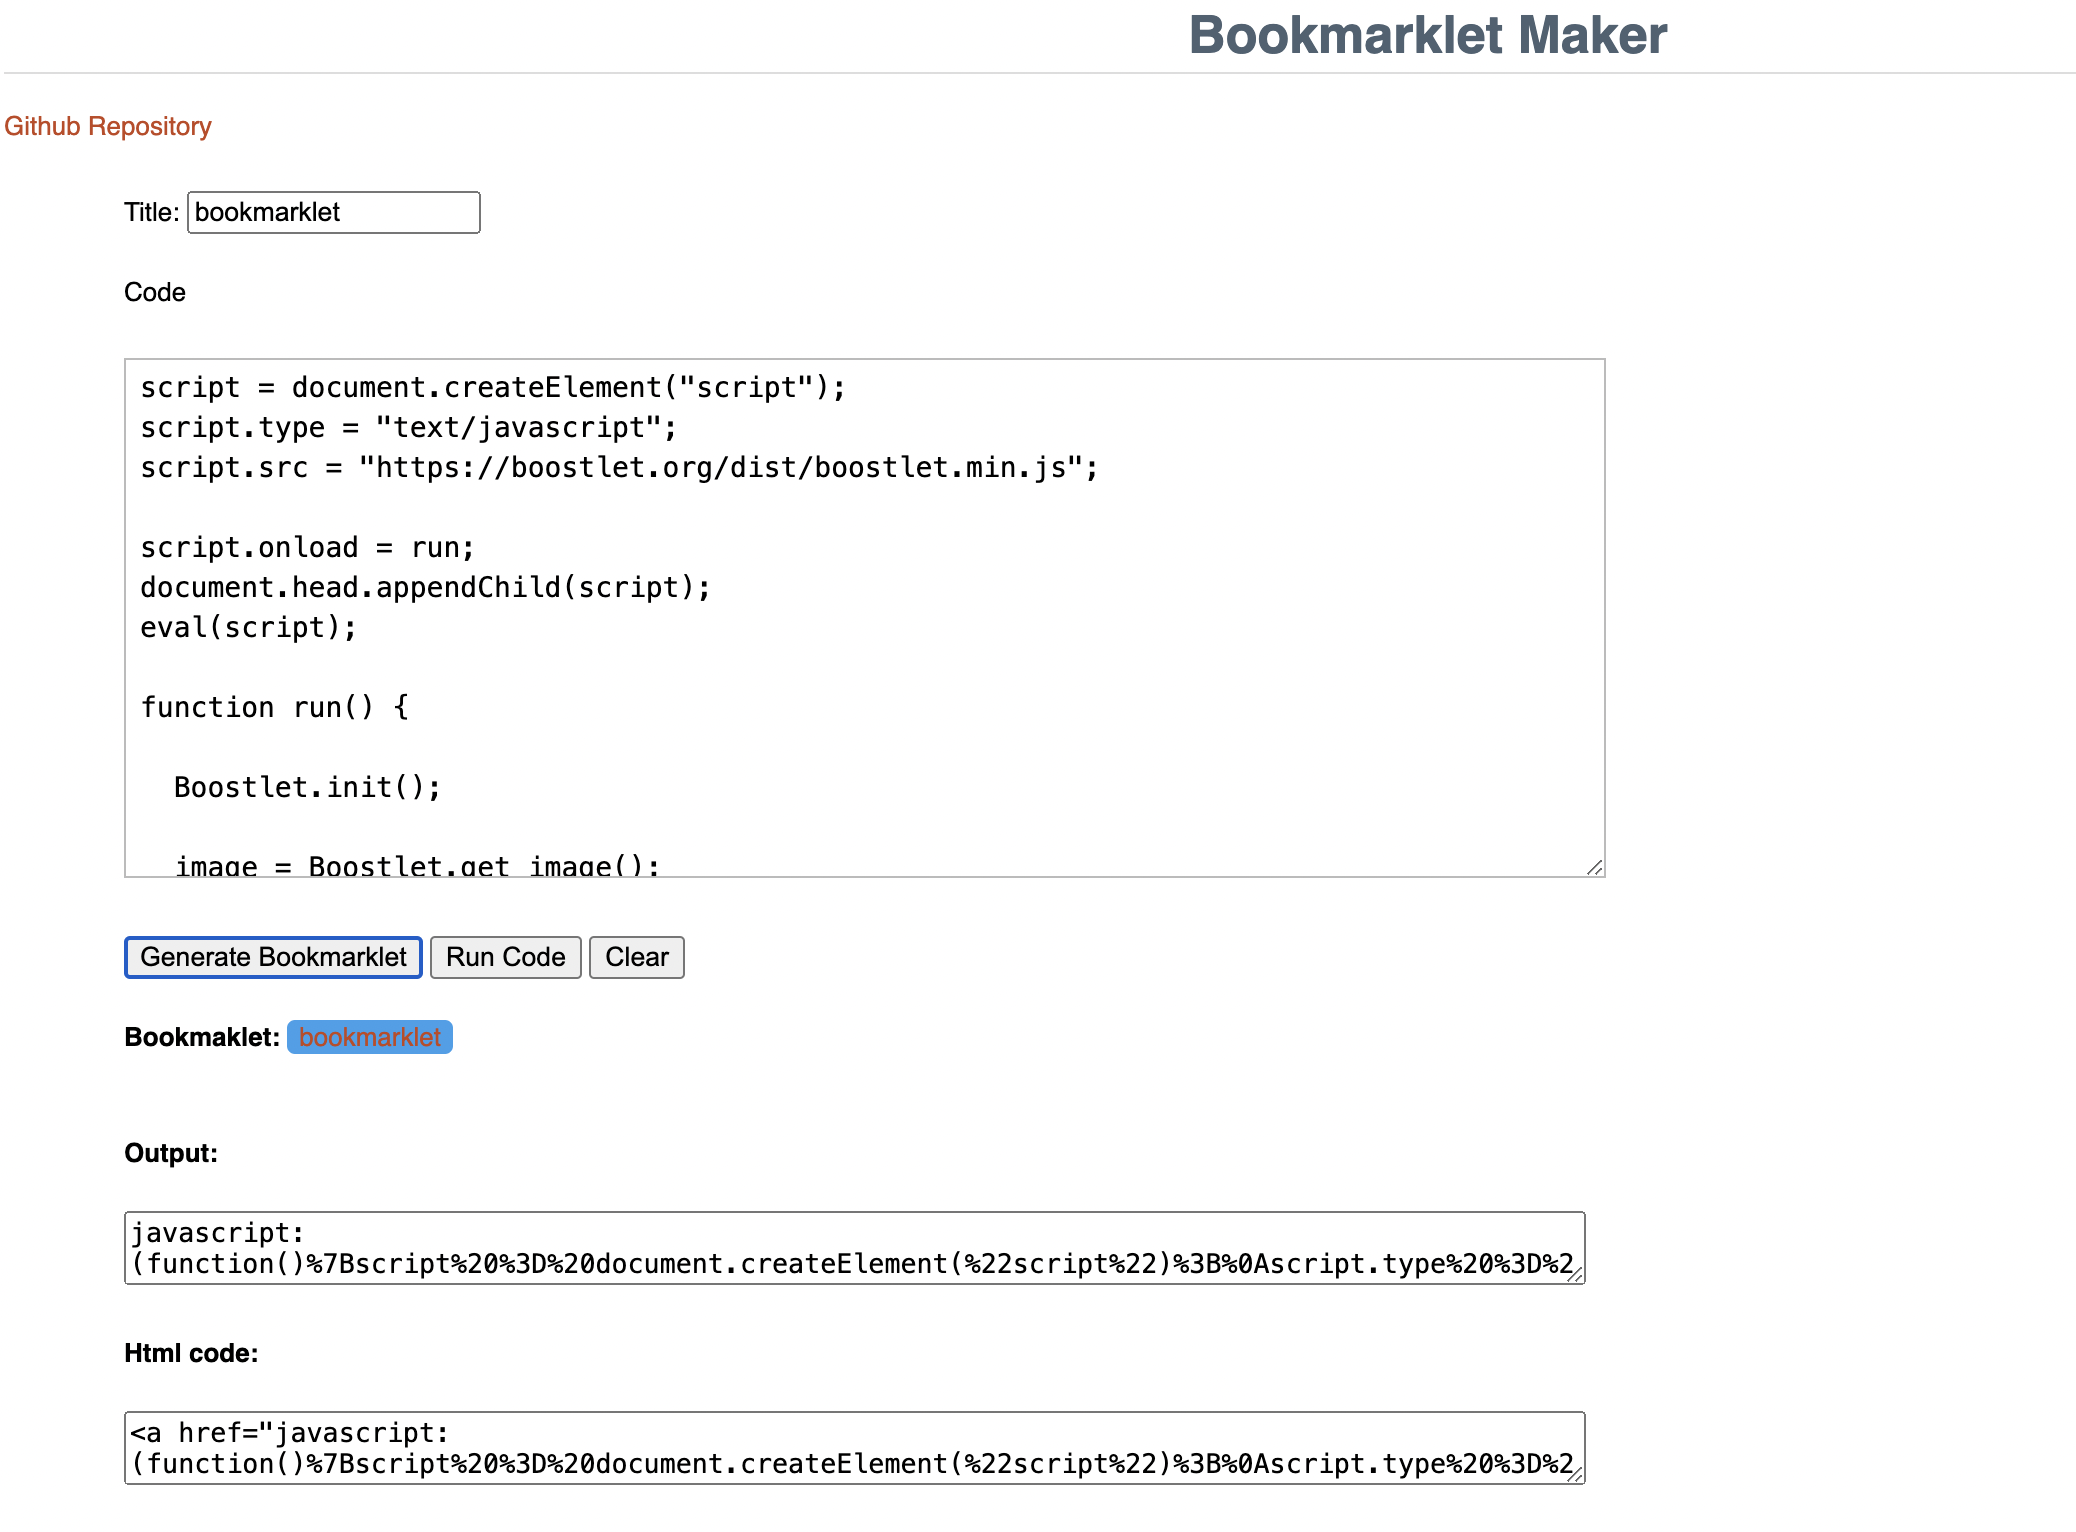

**Bonus**: Create a Boostlet that shows a slider UI to perform thresholding. [33 Points]

In [58]:
#
# For the bonus, please get inspired by the Plotly Histogram Boostlet that
# creates a UI with a <div>: https://github.com/mpsych/boostlet/blob/main/examples/plotly.js
# or the TRAKO Boostlet: https://github.com/mpsych/boostlet/blob/main/examples/trako.js
#

In [59]:
#
# The UI should pop up whenever the user clicks on your bookmarklet and then shows
# a slider that directly controls the thresholding of the IDC viewer.
#
# HINT: two seperate sliders for min and max are fine but this one would be better:
# https://medium.com/@predragdavidovic10/native-dual-range-slider-html-css-javascript-91e778134816
#
# The slider min and max values should be propagated based on the current slice.
#  Once the user modifies the slider, the threshold should update.
#
# HINT: Please store the original pixels so you can threshold without losing the
# original information and reset the view.
#

In [60]:
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";

script.onload = run;
document.head.appendChild(script);
eval(script);

function run() {

  Boostlet.init();
  image = Boostlet.get_image();

  min_value = find_min_value( image.data );
  max_value = find_max_value( image.data );

  let originalImageData = image.data.slice();

  show_slider(min_value, max_value, function() {

    // callback to execute when slider moves
    var slider_min = parseInt(document.getElementById('min-slider').value);
    var slider_max = parseInt(document.getElementById('max-slider').value);

    thresholded = threshold(originalImageData.slice(), slider_min, slider_max); // Make a copy to threshold


    Boostlet.set_image( thresholded);

  });

}

function find_max_value( pixels ) {

  // TODO: YOUR CODE FROM TASK 3

  MAX_VALUE = Math.max(...pixels);
  return MAX_VALUE

}

function find_min_value( pixels ) {

  // TODO: YOUR CODE FROM TASK 3 with min

  MIN_VALUE = Math.min(...pixels);
  return MIN_VALUE

}

function threshold( pixels, lower, upper ) {

  // TODO: YOUR CODE FROM TASK 4
   for (let i = 0; i < pixels.length; i++) {
  if (pixels[i] < lower || pixels[i] > upper) {
      pixels[i] = 0;
}
}

return pixels;

}

function show_slider( min_value, max_value, callback ) {

  let container = window.document.createElement('div');
  container.id = 'slider-container';
  container.style.position = 'absolute';
  container.style.top = '10px';
  container.style.left = '10px';
  container.style.zIndex = '1000';
  container.ondblclick = function() {
    // destroy on double click
    window.document.body.removeChild(container);
  }
  window.document.body.appendChild(container);


  // TODO your slider code with proper callbacks
    container.innerHTML = `
    <div style="background-color:white">
        <label for="min-slider">Min Value: <span id="min-display">${min_value}</span></label>
        <input type="range" id="min-slider" min="${min_value}" max="${max_value}" value="${min_value}" step="1"><br>
        <label for="max-slider">Max Value: <span id="max-display">${max_value}</span></label>
        <input type="range" id="max-slider" min="${min_value}" max="${max_value}" value="${max_value}" step="1">
        </div>
    `;

    document.getElementById('min-slider').addEventListener('input', function() {
        document.getElementById('min-display').innerText = this.value;
        callback();
    });

    document.getElementById('max-slider').addEventListener('input', function() {
        document.getElementById('max-display').innerText = this.value;
        callback();
    });

}


'''

'\n\nscript = document.createElement("script");\nscript.type = "text/javascript";\nscript.src = "https://boostlet.org/dist/boostlet.min.js";\n\nscript.onload = run;\ndocument.head.appendChild(script);\neval(script);\n\nfunction run() {\n\n  Boostlet.init();\n  image = Boostlet.get_image();\n\n  min_value = find_min_value( image.data );\n  max_value = find_max_value( image.data );\n\n  let originalImageData = image.data.slice();\n\n  show_slider(min_value, max_value, function() {\n\n    // callback to execute when slider moves\n    var slider_min = parseInt(document.getElementById(\'min-slider\').value);\n    var slider_max = parseInt(document.getElementById(\'max-slider\').value);\n\n    thresholded = threshold(originalImageData.slice(), slider_min, slider_max); // Make a copy to threshold\n\n\n    Boostlet.set_image( thresholded);\n\n  });\n\n}\n\nfunction find_max_value( pixels ) {\n\n  // TODO: YOUR CODE FROM TASK 3\n\n  MAX_VALUE = Math.max(...pixels);\n  return MAX_VALUE\n\n}\n\nf

In [61]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#